# Analisis Kolom Kematian anak dan GDP perkapita

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv('C:/Users/A r e s/Documents/SANBERCODE/Latihan/Pekan 4/datasets/Data_Negara_HELP.csv')

In [15]:
group1 = df.groupby(['Negara']).sum()
drop1 = group1.drop(columns=['Ekspor', 'Impor', 'Harapan_hidup', 'Kesehatan', 'Inflasi', 'Pendapatan', 'Jumlah_fertiliti'])
sort1 = drop1.sort_values(by='Kematian_anak', ascending=False)
sort1.head(15)

,Kematian_anak,GDPperkapita
Negara,,
Haiti,208.0,662
Sierra Leone,160.0,399
Chad,150.0,897
Central African Republic,149.0,446
Mali,137.0,708
Nigeria,130.0,2330
Niger,123.0,348
Angola,119.0,3530
Burkina Faso,116.0,575


Dari data diatas bisa dilihat hubungan kasar antara 'Kematian anak' dengan 'GDPperkapita', negara yang sedang dilanda konflik angka kematian anak akan tinggi, hal itu akan sangat berdampak ke nilai GDPperkapita

Hubungan sederhana dari kedua variabel bisa dilihat dari scatterplot dibawah 

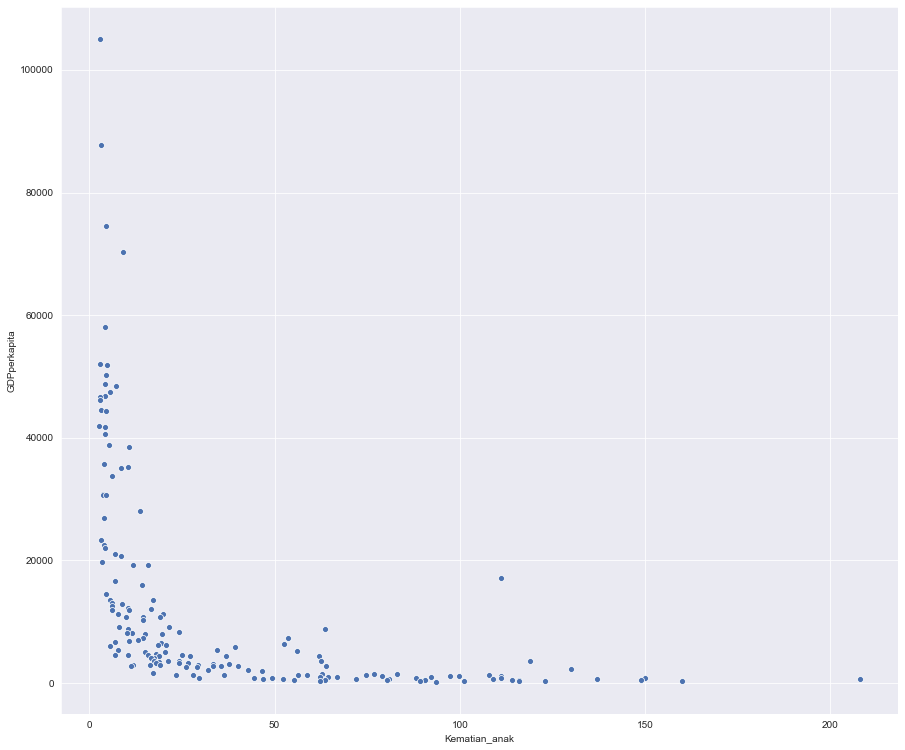

In [13]:
sns.set({'figure.figsize':(15,13)})
sns.scatterplot(x=sort1['Kematian_anak'] , y=sort1['GDPperkapita'])

In [34]:
pertimbangan2 = sort1[(sort1['Kematian_anak'] > 140) & (sort1['Kematian_anak'] < 300) & (sort1['GDPperkapita'] < 10000)]
pertimbangan2

,Kematian_anak,GDPperkapita
Negara,,
Haiti,208.0,662
Sierra Leone,160.0,399
Chad,150.0,897
Central African Republic,149.0,446


Berdasarkan Scatterplot diatas, terdapat 4 negara yang memiliki angka kematian anak tinggi yang berdampak ke GDPperkapitanya yang rendah :

- Haiti
- Sierra Leone
- Chad
- Central African Republic

4 negara tersebut akan dipertimbangkan untuk masuk kedalam 10 negera penerima bantuan Kemanusiaan dari HELP Internasional berdasarkan dampak kematian anak terhadap kemiskinan

## Analisis lebih lanjut tentang dampak Kematian anak terhadap GDPperkapita

Untuk menganalisis lebih lanjut topik ini, maka data pada kolom inflasi dan GDPperkapita harus dibersihkan terlebih dahulu

### Missing Value

In [18]:
#Check missing value
sort1.isnull().sum()

Kematian_anak    0
GDPperkapita     0
dtype: int64

Karena tidak ada missing value (data NaN) pada dataframe, jadi perlu dilakukan handling missing value

### Outliers dan Clustering

Mendeteksi outlier di kedua kolom menggunakan boxplot

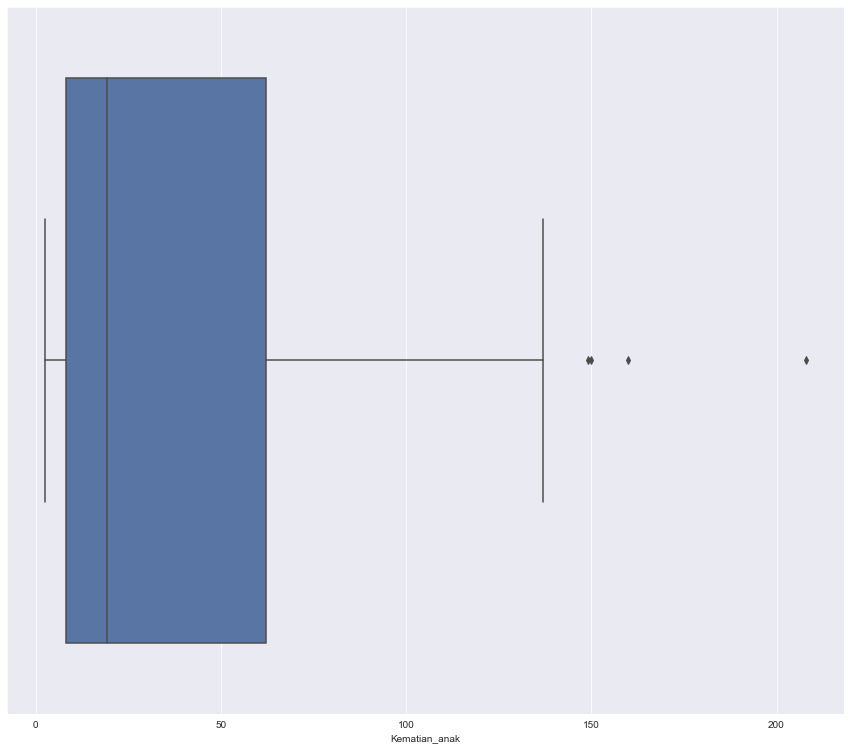

In [20]:
sns.boxplot(sort1['Kematian_anak'])

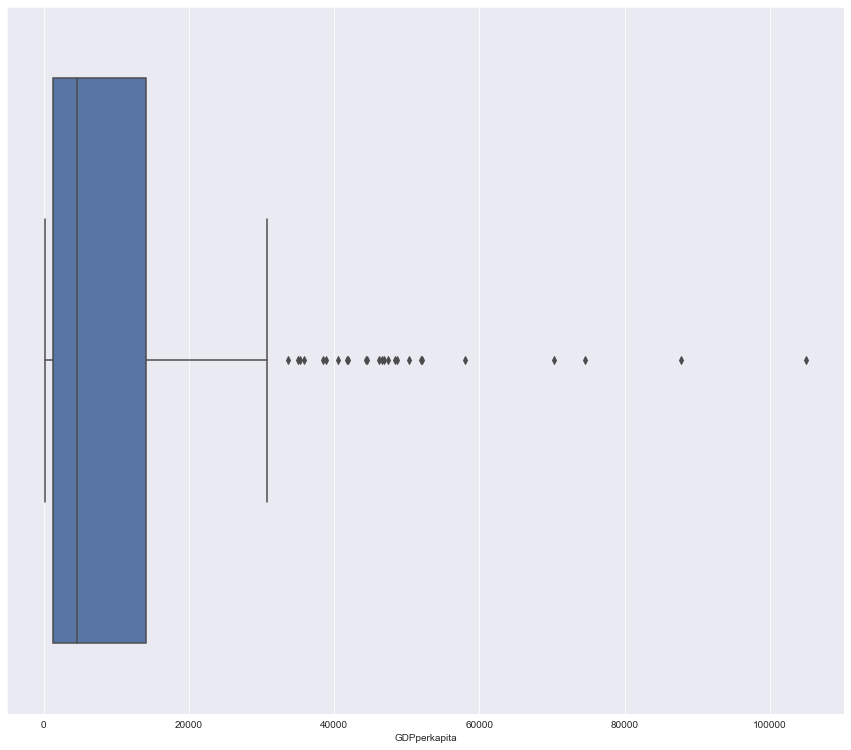

In [21]:
sns.boxplot(sort1['GDPperkapita'])

In [30]:
def batas(x) : 
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    df_final=df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    return df_final

data = batas(sort1[['Kematian_anak', 'GDPperkapita']])
data.dropna(axis=0, inplace=True)
data2 = pd.DataFrame(data=data, columns = ['Kematian_anak', 'GDPperkapita'])

sc = StandardScaler()
data_std = sc.fit_transform(data2.astype(float))

data3 = pd.DataFrame(data=data_std, columns = ['Kematian_anak', 'GDPperkapita'])

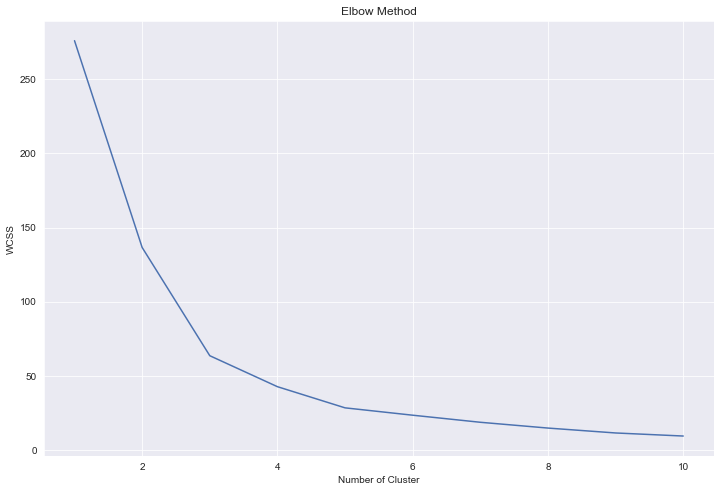

In [31]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(data3)
  wcss.append(kmeans.inertia_)

plt.subplots(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')

plt.show()

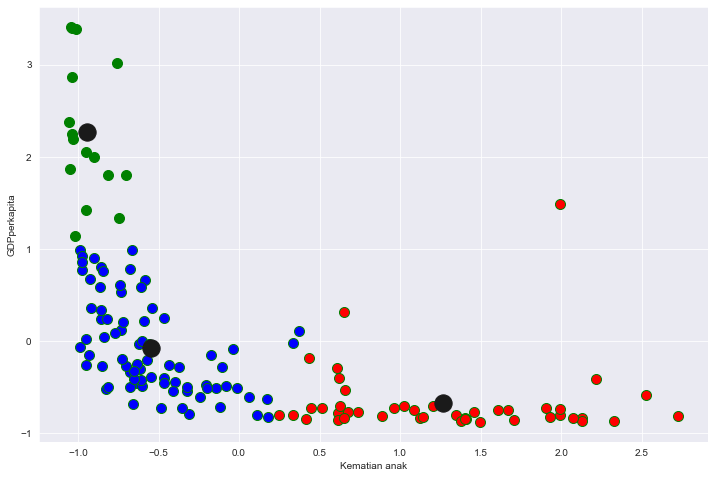

In [35]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(data_std)
labels1 = kmeans.labels_


data3['label_kmeans1'] = labels1

plt.subplots(figsize=(12,8))
plt.scatter(data3['Kematian_anak'][data3.label_kmeans1 == 0], data3['GDPperkapita'][data3.label_kmeans1 == 0], color='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(data3['Kematian_anak'][data3.label_kmeans1 == 1], data3['GDPperkapita'][data3.label_kmeans1 == 1], color='red', s=100, edgecolor='green', linestyle='-')
plt.scatter(data3['Kematian_anak'][data3.label_kmeans1 == 2], data3['GDPperkapita'][data3.label_kmeans1 == 2], color='green', s=100, edgecolor='green', linestyle='-')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('Kematian anak')
plt.ylabel('GDPperkapita')
plt.show()

Bisa dilihat dari hasil klaster diatas, klaster merah dan biru memiliki lebih banyak anggota daripada klaster hijau dan juga pada klaster merah dengan nilai kematian anak yang tinggi, angka GDPperkapitanya sangat rendah, hal ini bisa membuktikan kalau angka kematian_anak berpengaruh terhadap perekonomian suatu negara 

## Kesimpulan

Negara yang dipertimbangkan untuk dimasukkan sebagai penerima bantuan dari HELP Internasional :

- Haiti
- Sierra Leone
- Chad
- Central African Republic